In [17]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

import scipy.stats as stats


In [18]:
ROOT_SCC = "Sampling/scc"
ROOT_SCC_ALFLEX = "Sampling/scc_alflex"
FILENAME = "am.csv"

PATH_SCC = os.path.join(ROOT_SCC, FILENAME)
PATH_SCC_ALFLEX = os.path.join(ROOT_SCC_ALFLEX, FILENAME)

LOG_SCALE = False

# Read File

In [19]:
dataset = pd.read_csv(PATH_SCC_ALFLEX) # change the path here to choose from milking only dataset or milking + alflex

try:
    dataset = dataset.drop('CowID', axis=1)
    dataset = dataset.drop('MilkDate', axis=1)
    dataset = dataset.drop('Unnamed: 0', axis=1)
except:
    pass

dataset

,Duration,Milk,PFlow,DIM,SCC,Mean_Milk,Std_Milk,Mean_Duration,Std_Duration,Mean_Flow,...,Activity,Rumination,Min_Activity,Min_Rumination,Max_Activity,Max_Rumination,Mean_Activity,Std_Activity,Mean_Rumination,Std_Rumination
0,6.88,14.15,3.1,173,137.5,13.498,0.690703,6.804,0.322614,2.88,...,39.375000,45.250000,24.0,9.0,54.0,73.0,40.952879,1.220856e+00,42.199394,2.838007
1,6.63,13.59,3.1,174,137.5,13.708,0.441158,6.864,0.225788,2.94,...,42.636364,36.454545,25.0,4.0,67.0,61.0,40.963485,1.238662e+00,40.940303,3.774609
2,6.70,13.14,2.8,175,137.5,13.518,0.440080,6.774,0.164712,2.90,...,41.375000,44.750000,26.0,31.0,64.0,58.0,40.971818,1.241908e+00,41.823636,4.099838
3,6.45,13.01,3.1,176,137.5,13.508,0.453453,6.662,0.154175,3.00,...,42.000000,38.500000,26.0,4.0,62.0,63.0,41.331818,1.222988e+00,40.663636,4.044158
4,6.81,11.97,2.8,177,137.5,13.172,0.806734,6.694,0.167123,2.98,...,41.142857,37.428571,25.0,20.0,57.0,56.0,41.305844,1.225932e+00,40.476623,4.195880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48994,5.03,13.58,5.2,60,159.0,14.386,0.658164,4.786,0.364870,5.04,...,43.583333,35.250000,25.0,1.0,71.0,72.0,42.990000,2.047783e+00,39.000000,4.057555
48995,4.96,15.99,4.8,61,159.0,14.734,0.959364,4.876,0.333961,4.90,...,43.583333,35.250000,25.0,1.0,71.0,72.0,43.790000,7.616320e-01,37.050000,2.495245
48996,4.70,15.56,5.2,62,159.0,15.046,0.913554,4.956,0.168315,4.94,...,43.583333,35.250000,25.0,1.0,71.0,72.0,43.886667,6.782740e-01,36.260000,2.258429
48997,5.13,15.17,4.9,63,159.0,15.096,0.911773,4.950,0.159531,4.94,...,43.583333,35.250000,25.0,1.0,71.0,72.0,43.583333,4.562530e-07,35.250000,0.000000


# Downsampling

In [20]:
# 根据SCC值将数据分成三个区间
df_0_100 = dataset[(dataset['SCC'] >= 0) & (dataset['SCC'] <= 100)]
df_100_200 = dataset[(dataset['SCC'] > 100) & (dataset['SCC'] <= 200)]
df_over_200 = dataset[dataset['SCC'] > 200]

# 对于SCC在0-100和100-200这两个区间的数据，分别进行downsampling，保留其中的200行数据
df_0_100_downsampled = df_0_100.sample(n=min(200, len(df_0_100)), random_state=42)
df_100_200_downsampled = df_100_200.sample(n=min(200, len(df_100_200)), random_state=42)

# 合并处理后的数据
dataset = pd.concat([df_0_100_downsampled, df_100_200_downsampled, df_over_200], ignore_index=True)
dataset

,Duration,Milk,PFlow,DIM,SCC,Mean_Milk,Std_Milk,Mean_Duration,Std_Duration,Mean_Flow,...,Activity,Rumination,Min_Activity,Min_Rumination,Max_Activity,Max_Rumination,Mean_Activity,Std_Activity,Mean_Rumination,Std_Rumination
0,16.06,25.02,6.2,24,12.0,23.946,1.160530,12.136,5.055357,6.14,...,43.000000,36.166667,23.0,1.0,65.0,63.0,39.733333,3.353921,42.530952,7.935907
1,7.80,14.77,3.8,21,21.7,20.788,3.379056,8.756,1.044763,3.82,...,39.777778,15.666667,23.0,2.0,64.0,35.0,37.030556,6.497020,23.158333,6.927852
2,7.15,16.73,4.0,103,9.4,18.406,1.385886,7.940,1.023108,4.12,...,47.000000,40.818182,31.0,6.0,67.0,95.0,50.399286,10.587341,40.635065,7.061103
3,7.50,11.77,3.0,253,14.2,11.336,0.979020,7.070,0.329621,2.94,...,50.250000,49.000000,26.0,8.0,72.0,89.0,50.780000,1.469949,41.610000,7.201944
4,10.65,28.39,4.0,41,1.7,27.914,1.201387,10.998,1.129765,3.94,...,44.714286,46.714286,28.0,18.0,78.0,80.0,42.142857,3.211904,44.372619,10.357098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,4.76,8.15,3.6,303,297.9,9.086,0.978279,4.482,0.461866,3.86,...,50.400000,31.700000,28.0,5.0,74.0,83.0,45.677186,3.216628,38.820087,7.878449
735,4.81,12.28,4.0,339,822.5,10.826,0.960146,4.364,0.312218,4.00,...,47.500000,36.666667,26.0,2.0,82.0,78.0,44.736364,4.134165,37.860606,4.925552
736,6.50,15.50,3.6,105,841.0,17.548,1.533418,15.242,6.479812,3.58,...,44.166667,49.500000,28.0,9.0,73.0,101.0,44.038788,2.718676,41.887273,8.111905
737,4.70,7.51,3.1,303,892.0,9.518,1.355146,6.358,2.210977,3.16,...,41.909091,35.818182,25.0,3.0,74.0,78.0,48.662273,15.913998,37.217273,8.547230


# QQ Plot to detect outlier

In [21]:
# print("Original shape:", dataset.shape)

# # Create Q-Q plots for each numerical variable
# for column in dataset.columns:
#     if dataset[column].dtype in [np.float64, np.int64]:
#         plt.figure(figsize=(8, 4))
#         stats.probplot(dataset[column], dist="norm", plot=plt)
#         plt.title(f'Q-Q Plot for {column}')
#         # plt.show()

# # Remove outliers based on a threshold (e.g., 3 standard deviations)
# threshold = 3
# dataset = dataset[(np.abs(stats.zscore(dataset)) < threshold).all(axis=1)]


# print("Shape after removing outliers:", dataset.shape)

# Random Forest

In [22]:
X = dataset.drop(columns=['SCC'])
y = dataset['SCC']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build random forest regression 
rf_regressor = RandomForestRegressor(n_estimators=50, random_state=765, max_depth=7)
rf_regressor.fit(X_train, y_train)

# predict on test data
y_pred = rf_regressor.predict(X_test)

# calculate r-square and LCCC
r2 = r2_score(y_test, y_pred)
corrcoef = np.corrcoef(y_test, y_pred)[0, 1]

# calculate regression slope and intercept
if LOG_SCALE:
    y_pred_scale = np.log(y_pred)
    y_test_scale = np.log(y_test)
else:
    y_pred_scale = y_pred
    y_test_scale = y_test

slope, intercept = np.polyfit(y_pred_scale, y_test_scale, 1)

print(f'R-Square: {r2}')
print(f'LCCC: {corrcoef}')

R-Square: 0.24632020094108398
LCCC: 0.5009531900629212


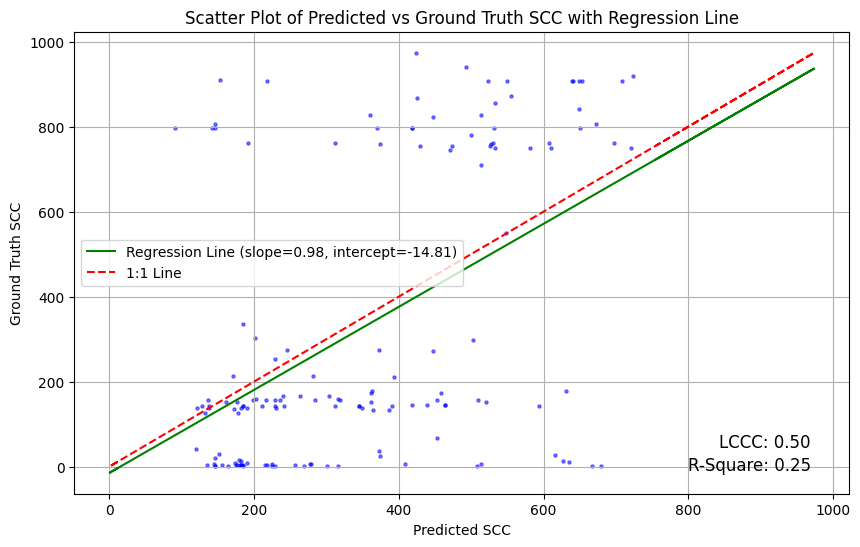

In [23]:
# 绘制散点图和回归线
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_scale, y_test_scale, color='blue', alpha=0.5, s=5)
plt.plot(y_test_scale, slope*y_test_scale + intercept, color='green', linestyle='-',
         label=f'Regression Line (slope={slope:.2f}, intercept={intercept:.2f})')
plt.plot(y_test_scale, y_test_scale, color='red', linestyle='--', label='1:1 Line')
plt.xlabel('Predicted SCC')
plt.ylabel('Ground Truth SCC')
plt.title('Scatter Plot of Predicted vs Ground Truth SCC with Regression Line')


# Add R-square and LCCC values to the plot
plt.text(0.95, 0.05, f'R-Square: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='right')
plt.text(0.95, 0.1, f'LCCC: {corrcoef:.2f}', transform=plt.gca().transAxes, fontsize=12, ha='right')

plt.legend()
plt.grid(True)
plt.show()

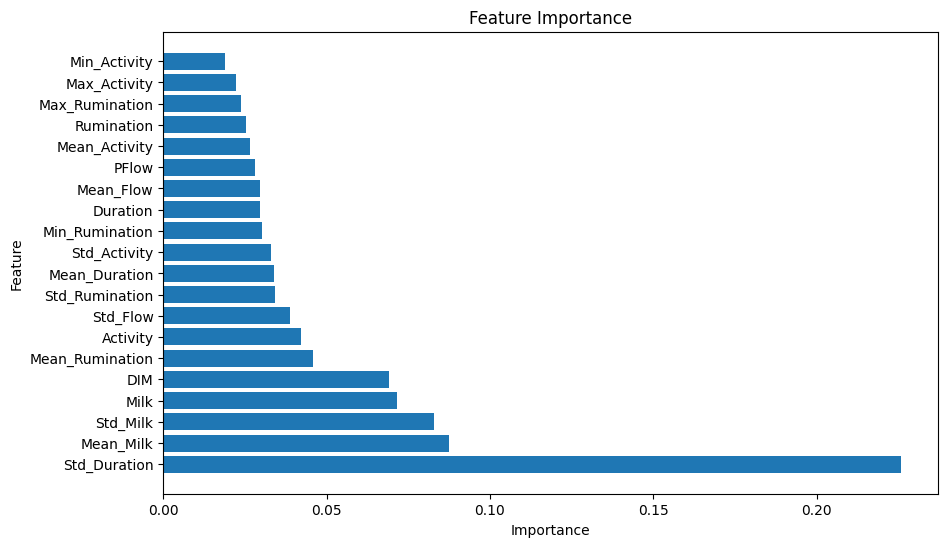

In [24]:
# get feature importance
feature_importance = rf_regressor.feature_importances_

# get feature name
features = X.columns

# create a dataframe to store importance value
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# sort by importance value
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot histogram
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


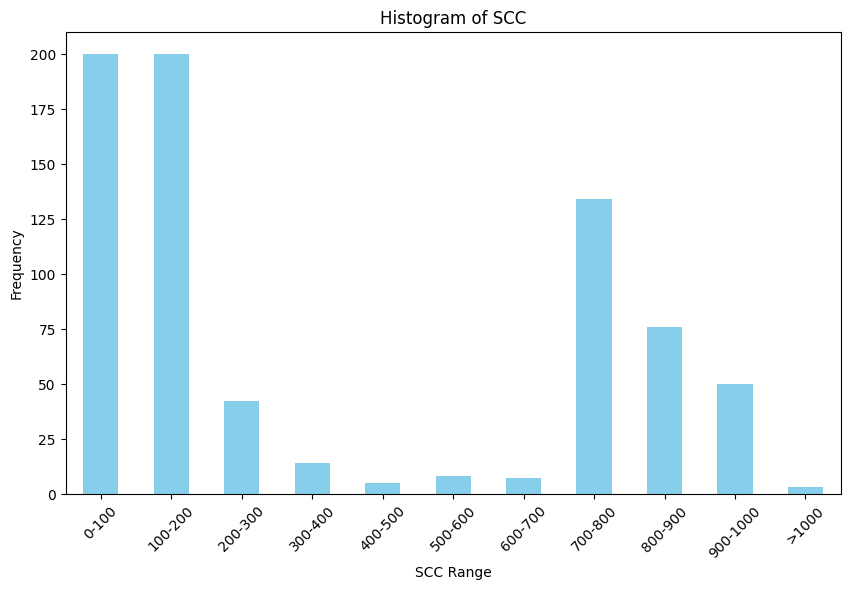

In [25]:
# 对 SCC 列进行分组和计数
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '>1000']
dataset['SCC_group'] = pd.cut(dataset['SCC'], bins=bins, labels=labels, right=False)

# 绘制直方图
plt.figure(figsize=(10, 6))
dataset['SCC_group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('SCC Range')
plt.ylabel('Frequency')
plt.title('Histogram of SCC')
plt.xticks(rotation=45)
plt.show()

In [26]:
dataset['SCC_group'].value_counts()

0-100       200
100-200     200
700-800     134
800-900      76
900-1000     50
200-300      42
300-400      14
500-600       8
600-700       7
400-500       5
>1000         3
Name: SCC_group, dtype: int64